In [20]:
%pip install statsmodels==0.13.1

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [21]:
%pip install numpy
%pip install pandas
%pip install statsmodels.tsa.ar_model
%pip install matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodels.tsa.ar_model (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa.ar_model
You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
import numpy as np
import pandas as pd


In [24]:
train = pd.read_excel('train.xlsx')
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [18]:
train.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [19]:
train.fillna(method='bfill', inplace=True)
train

C:\Users\user\AppData\Local\Temp\ipykernel_4668\369454286.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='bfill', inplace=True)


,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [25]:
train.replace(np.nan, 0, inplace=True)
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [26]:
train = train.set_index(['dt'])

ПОСТРОЕНИЕ МОДЕЛИ 

<Axes: title={'center': 'Time series'}, xlabel='dt', ylabel='Цена на арматуру'>

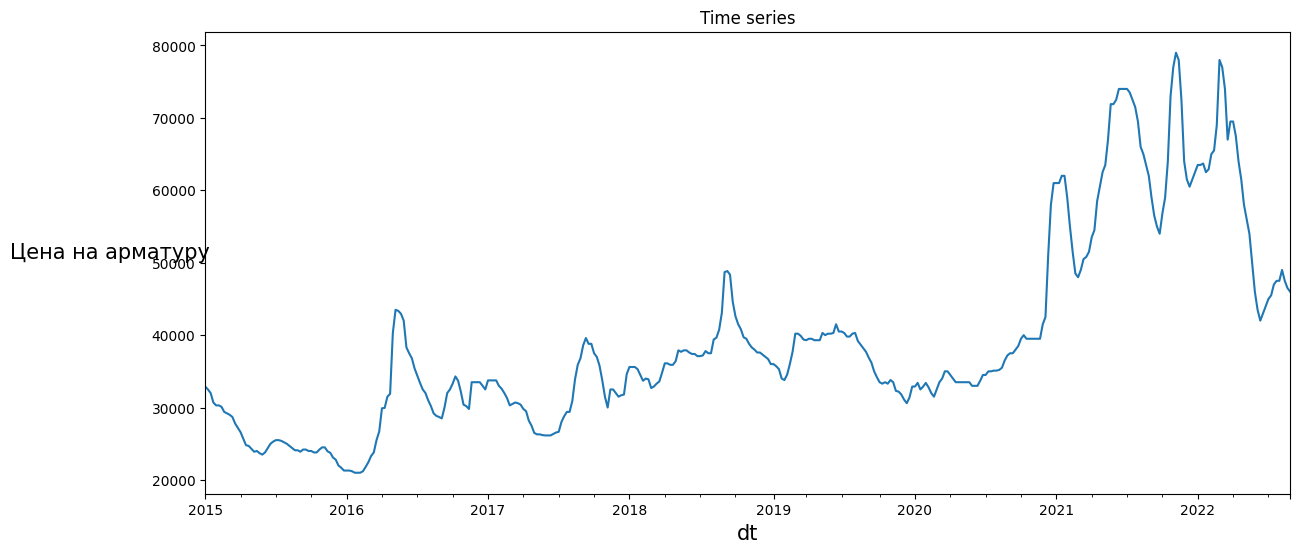

In [29]:
import matplotlib.pyplot as plt
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('dt', fontsize=15)
plt.ylabel('Цена на арматуру', rotation=0, labelpad=30, fontsize=15)
train['Цена на арматуру'].plot()

<Axes: title={'center': 'Residual'}, xlabel='dt'>

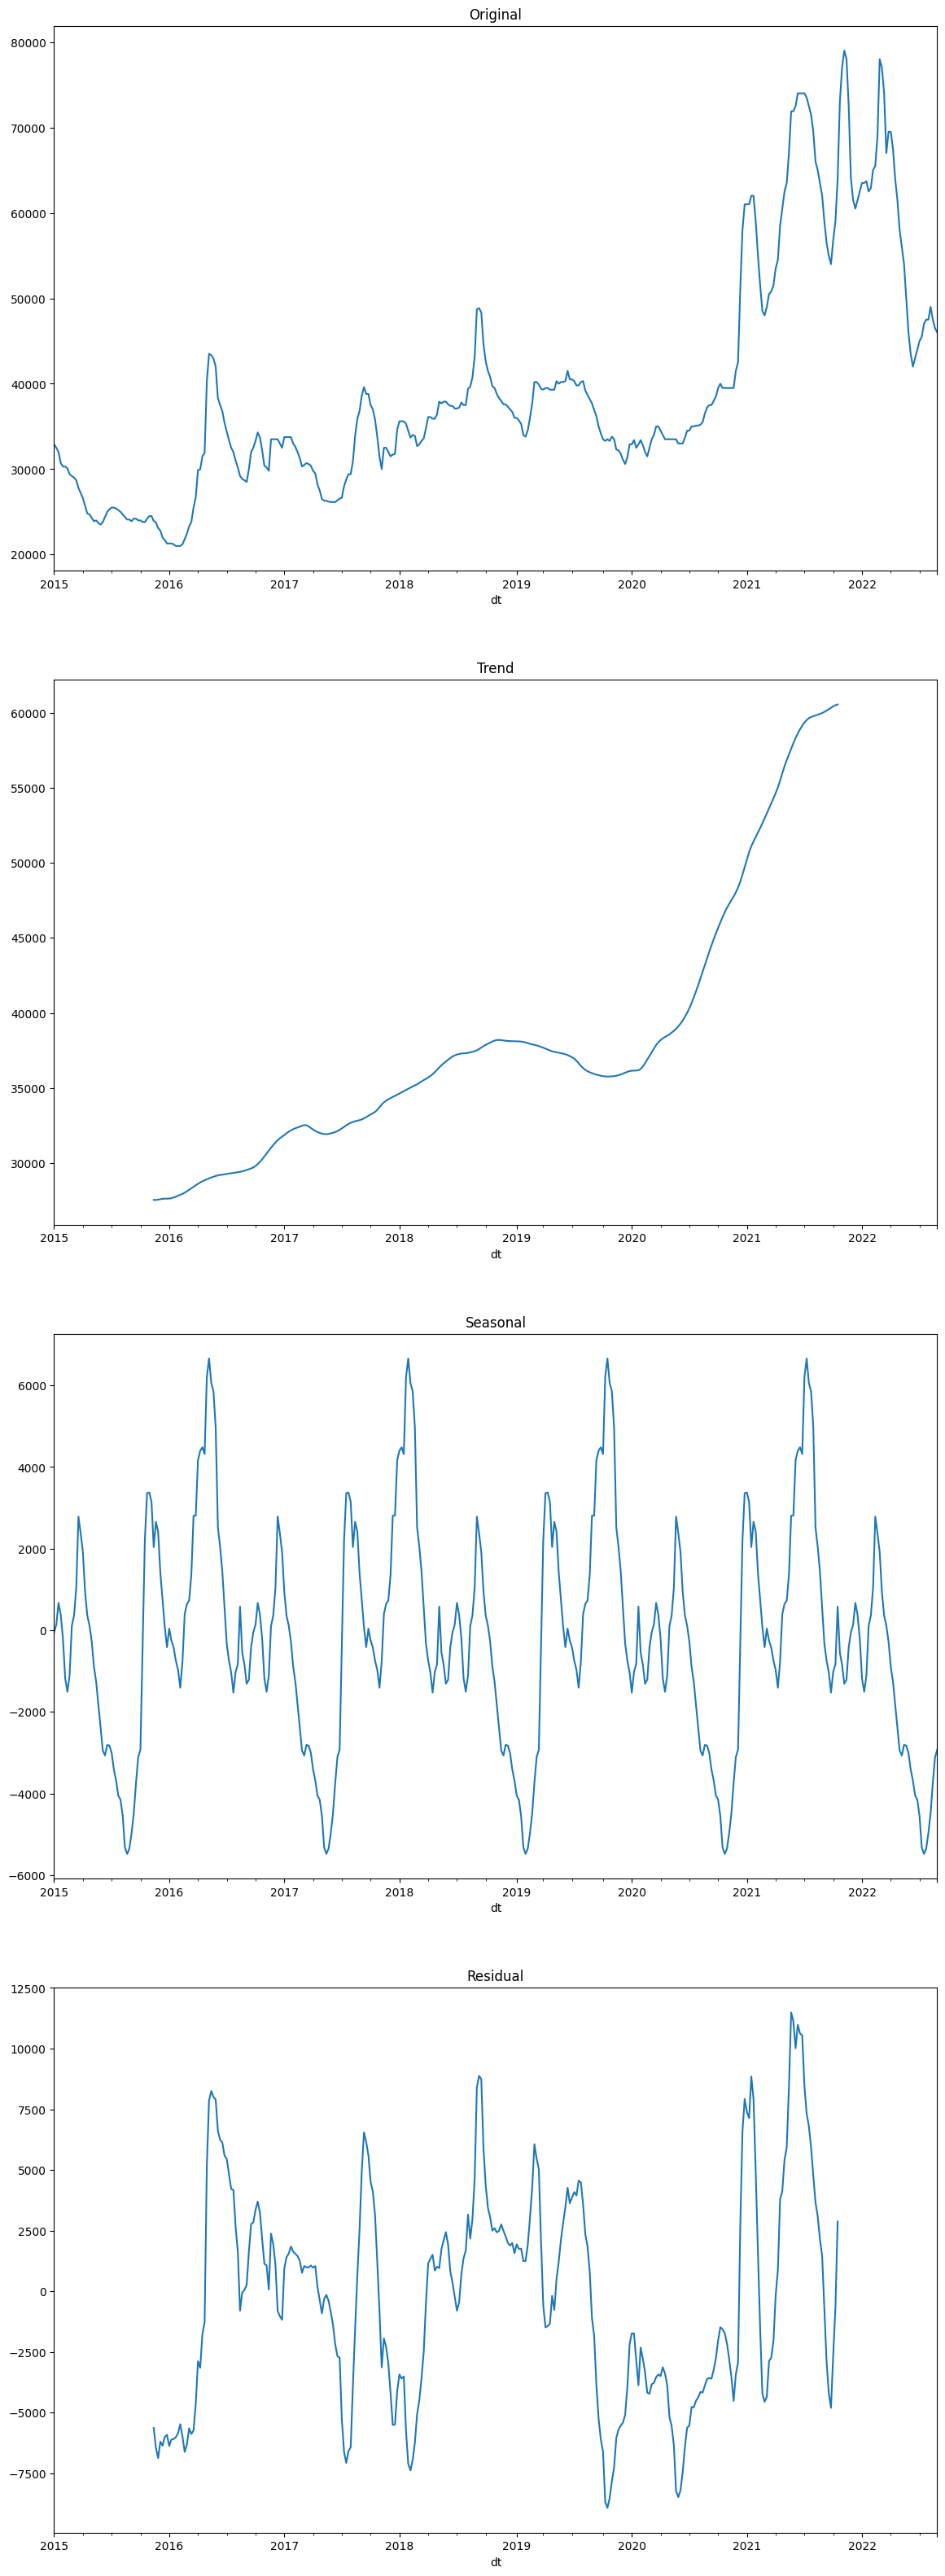

In [30]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(train[['Цена на арматуру']], period=90)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])

АВТОКОРЕЛЯЦИЯ

In [53]:
import numpy as np
import pandas as pd

def autocorrelation(data, lag=1):
    """
    Вычисляет автокорреляцию для заданного лага.
    
    :param data: Входные данные (одномерный массив или список).
    :param lag: Лаг, для которого вычисляется автокорреляция.
    :return: Значение автокорреляции для заданного лага.
    """
    n = len(data)
    mean = np.mean(data)
    
    # Вычисляем автокорреляцию
    autocorr_value = np.sum((data[:n-lag] - mean) * (data[lag:] - mean)) / np.sum((data - mean) ** 2)
    
    return autocorr_value

def autocorrelation_from_file(file_path, column_name=None, max_lag=10):
    """
    Вычисляет автокорреляцию для данных из файла.
    
    :param file_path: Путь к файлу с данными.
    :param column_name: Название столбца с данными (если файл содержит таблицу).
    :param max_lag: Максимальный лаг для вычисления автокорреляции.
    :return: Список значений автокорреляции для каждого лага.
    """
    # Загрузка данных из файла
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    else:
        raise ValueError("Формат файла не поддерживается. Используйте CSV или Excel.")
    
    # Если указан столбец, используем его, иначе берем первый столбец
    if column_name:
        data_series = data[column_name]
    else:
        data_series = data.iloc[:, 0]
    
    # Вычисляем автокорреляцию для каждого лага
    autocorr_values = []
    for lag in range(1, max_lag + 1):
        autocorr_values.append(autocorrelation(data_series, lag))
    
    return autocorr_values

# Пример использования
file_path = 'train.xlsx'  # Укажите путь к вашему файлу
column_name = 'Цена на арматуру'   # Укажите название столбца, если необходимо
autocorr_values = autocorrelation_from_file(file_path, column_name, max_lag=60)

print("Значения автокорреляции для различных лагов:")
for lag, value in enumerate(autocorr_values, start=1):
    print(f"Лаг {lag}: {value:.4f}")




Значения автокорреляции для различных лагов:
Лаг 1: 0.9988
Лаг 2: 0.9974
Лаг 3: 0.9958
Лаг 4: 0.9934
Лаг 5: 0.9913
Лаг 6: 0.9893
Лаг 7: 0.9873
Лаг 8: 0.9854
Лаг 9: 0.9835
Лаг 10: 0.9817
Лаг 11: 0.9800
Лаг 12: 0.9781
Лаг 13: 0.9758
Лаг 14: 0.9729
Лаг 15: 0.9688
Лаг 16: 0.9628
Лаг 17: 0.9560
Лаг 18: 0.9479
Лаг 19: 0.9377
Лаг 20: 0.9260
Лаг 21: 0.9114
Лаг 22: 0.8952
Лаг 23: 0.8791
Лаг 24: 0.8653
Лаг 25: 0.8456
Лаг 26: 0.8230
Лаг 27: 0.7995
Лаг 28: 0.7845
Лаг 29: 0.7722
Лаг 30: 0.7602
Лаг 31: 0.7496
Лаг 32: 0.7391
Лаг 33: 0.7276
Лаг 34: 0.7162
Лаг 35: 0.7048
Лаг 36: 0.6940
Лаг 37: 0.6839
Лаг 38: 0.6745
Лаг 39: 0.6643
Лаг 40: 0.6526
Лаг 41: 0.6338
Лаг 42: 0.6095
Лаг 43: 0.5843
Лаг 44: 0.5614
Лаг 45: 0.5425
Лаг 46: 0.5307
Лаг 47: 0.5219
Лаг 48: 0.5140
Лаг 49: 0.5072
Лаг 50: 0.4996
Лаг 51: 0.4911
Лаг 52: 0.4812
Лаг 53: 0.4695
Лаг 54: 0.4568
Лаг 55: 0.4430
Лаг 56: 0.4284
Лаг 57: 0.4110
Лаг 58: 0.3918
Лаг 59: 0.3718
Лаг 60: 0.3512
